IFMA

CURSO DE SISTEMA DE INFORMAÇÃO

DISC. Introdução aos Sistemas Inteligentes

[Ativ] Atividade 1 - Análise de Regressão - Prof.Josenildo Costa da Silva

•	Iago Balbino Barbosa de Carvalho - SI1613008-21



1) Questão : Escolha um conjunto de dados e guarde a URL do mesmo. 
    

URL:https://drive.google.com/file/d/1wHiZ-tBYo4wU51Ry1k_ou0W5625LT6IS/view



2) Questão: Faça uma descrição do dataset (ex: describe, summary do pandas, etc.)

- Esses dados trazem valores gastos com propagandas e o retorno em vendas.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score
import statsmodels.api as sm
import os

In [31]:
df_dados = pd.read_csv("C:/Users/Iago Balbino/Advertising.csv")

In [32]:
#verificando a estrutura dos dados importados: linhas e colunas
print(df_dados.shape)

(200, 5)


In [33]:
#verificando o conteúdo das primeiras linhas do dataset
df_dados.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [34]:
print(df_dados.describe())

       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


Coluna "Unnamed: 0", ela existe mas não tem relevância no projeto. Por esse motivo vamos retira-la:

In [35]:
df_dados.drop(['Unnamed: 0'], axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


 3) Faça uma análise visual dos atributos (scatter plots, correlações, etc)

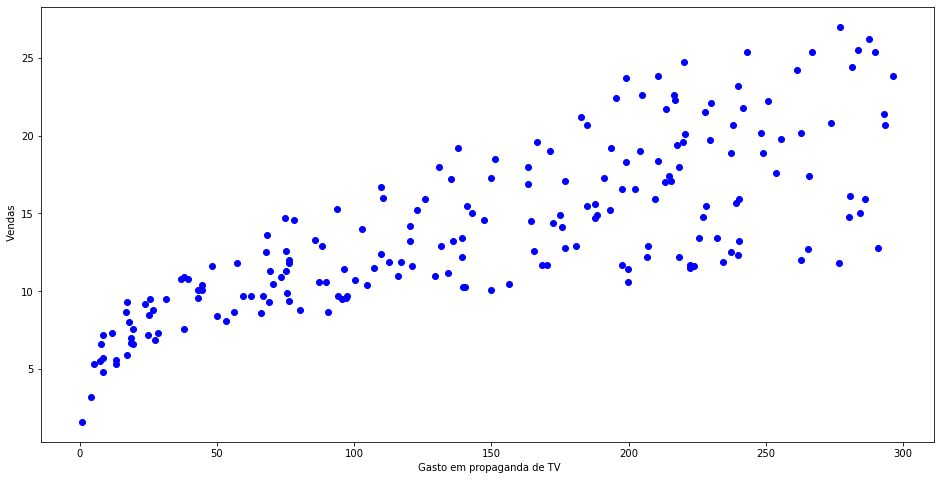

In [36]:
#gasto em TV com relação ao retorno de vendas
plt.figure(figsize = (16,8))
plt.scatter(
    df_dados['TV'], 
    df_dados['sales'], 
    c='blue')
plt.xlabel(" Gasto em propaganda de TV")
plt.ylabel(" Vendas")
plt.show()

4) Escolha uma váriável para ser o atributo alvo, o y da regressão,  e explique por que você a escolheu.
- Vendas, será o valor que queremos prever. A variável de resposta, que irá trazer valor ao negócio.

5) Escolha uma só variável preditora x e explique por que ela foi escolhida. 
- Gasto em propagandas de TV, pois é uma variável com valor independente, em que ela tem o poder de influenciar na variável que queremos encontrar. 

6) Realize a regressão simples utilizando apenas o x e y escolhidos por você. Discuta qual método de regressão foi escolhido (OLS, algébrico, etc). Também indique qual biblioteca foi utilizada.

OBS: Utilizei o modelo de regressão da biblioteca scikit-learn.

In [37]:
# modelo para prever o quanto teremos de retorno com o investimento em TV
# X = valor investido em propaganda de TV.
# Y = vendas.

X = df_dados['TV'].values.reshape(-1,1)
y = df_dados['sales'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)


print("O modelo é: Vendas = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))


O modelo é: Vendas = 7.0326 + 0.047537X


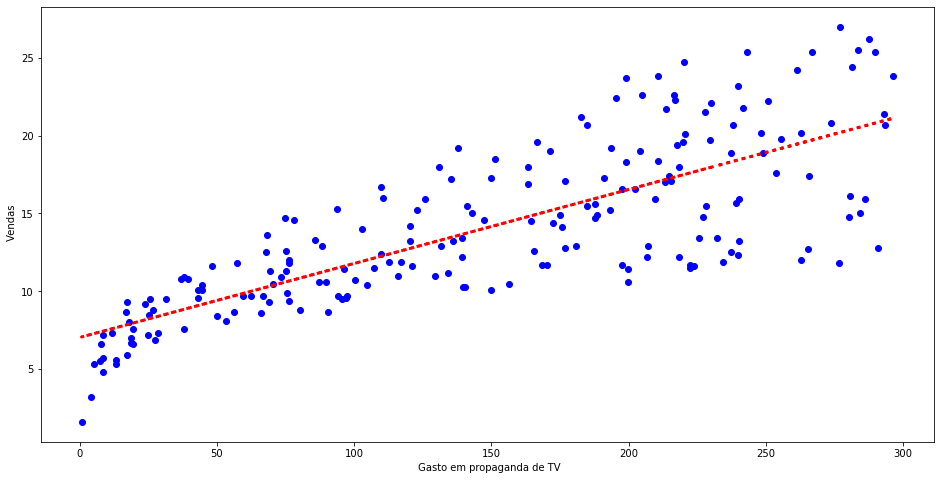

In [38]:
# Analisando o modelo em cima de dados.
f_previsaoes = reg.predict(X)


plt.figure(figsize = (16,8))
plt.scatter(
    df_dados['TV'], 
    df_dados['sales'], 
    c='blue')


plt.plot(
    df_dados['TV'],
    f_previsaoes,
    c='red',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" Gasto em propaganda de TV")
plt.ylabel(" Vendas")
plt.show()


In [39]:
# Avaliando a qualidade através do  R² e do p-valor
X = df_dados['TV']
y = df_dados['sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           1.47e-42
Time:                        16:23:23   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

- R² está em 0.612, isso quer dizer que aproximadamente 60% do comportamento da variável "Vendas" é explicado pela variável "TV".
- Quando analisamos o "p-valor" observamos que ele está bem baixo, o que faz rejeitar a hipótese nula.
- Mesmo tendo números razoáveis, em uma empresa com situações do mundo real esse modelo não seria considerado bom.

7) Adicione outras variável preditoras (x1, x2, x3, etc). Agora realize uma regressão multivariável.

In [49]:
# Construindo o modelo ...

Xs = df_dados.drop(['sales', 'Unnamed: 0'], axis=1)
y = df_dados['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs, y)


print("O modelo é: Vendas = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], 
                                                                                     reg.coef_[0][1], reg.coef_[0][2]))


O modelo é: Vendas = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper


In [44]:
# Adicionando dois novos dados, 'radio' e 'newspaper'
X = np.column_stack((df_dados['TV'], df_dados['radio'], df_dados['newspaper']))
y = df_dados['sales']


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           1.58e-96
Time:                        16:25:00   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

8) Análise de resultados utilizando uma métrica de performance (r2, por exemplo). Compare os modelos encontrados nos itens 3 e 4

- No primeiro momento tinhamos, R² está em 0.612, isso quer dizer que aproximadamente 60% do comportamento da variável "Vendas" é explicado pela variável "TV". Agora temos um modelo muito melhor, onde quase 90% dos resultados em vendas são explicados pelas variáveis que temos. Além disso, observa-se a informação dada pela "Estatística-F", esse número mostra que temos uma variância muito alta.

- Observa-se também o "p-valor" da terceira varável, ela representa os investimentos em "newspaper", o valor dela está muito alto, quase atingindo 1.0, ou seja, essa variável não possui relevância estatística em nosso modelo.

